# Personal Diary Tracker

Goal: Input daily diary entries and track the "Mood Graph" over a week. Tech: Sentiment analysis on daily text.

## Step 1: Install Required Libraries

In [21]:
pip install transformers torch matplotlib

## Step 2: Import Libraries

In [22]:
from transformers import pipeline
import matplotlib.pyplot as plt

## Step 3: Load Hugging Face Sentiment Model

In [23]:
sentiment_analyzer = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


## Step 4: Write Diary Entries (Input)

In [35]:
diary_entries = {
    "Monday": "I felt really happy and energetic today",
    "Tuesday": "Work was stressful and exhausting",
    "Wednesday": "It was an okay day, nothing special",
    "Thursday": "I am proud of myself for completing my tasks",
    "Friday": "Feeling tired and unmotivated",
    "Saturday": "Had fun with friends and relaxed",
    "Sunday": "Feeling calm and grateful"
}


## Step 5: Analyze Mood for Each Day

In [36]:
mood_scores = {}
mood_labels = {}

for day, entry in diary_entries.items():
    result = sentiment_analyzer(entry)[0]

    label = result['label']
    score = result['score']

    if label == "POSITIVE":
        mood_scores[day] = score
        mood_labels[day] = "Positive "
    else:
        mood_scores[day] = -score
        mood_labels[day] = "Negative "


## Step 6: View Mood Analysis Results

In [37]:
for day in mood_scores:
    print(f"{day}: {mood_labels[day]} ({mood_scores[day]:.2f})")


Monday: Positive  (1.00)
Tuesday: Negative  (-1.00)
Wednesday: Negative  (-0.88)
Thursday: Positive  (1.00)
Friday: Negative  (-1.00)
Saturday: Positive  (1.00)
Sunday: Positive  (1.00)


## Step 7: Plot the Mood Graph

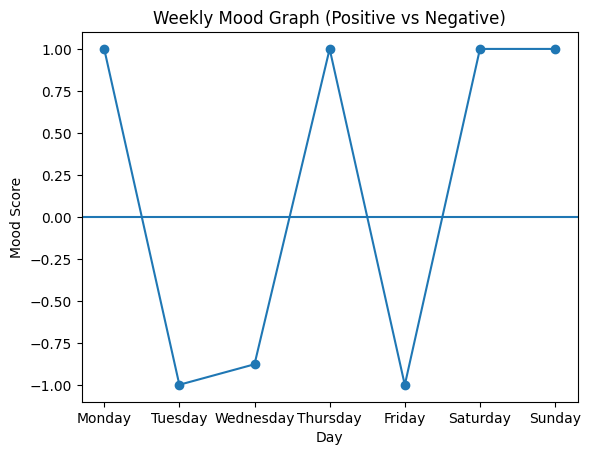

In [38]:
days = list(mood_scores.keys())
scores = list(mood_scores.values())

plt.figure()
plt.plot(days, scores, marker='o')
plt.axhline(0)
plt.title("Weekly Mood Graph (Positive vs Negative)")
plt.xlabel("Day")
plt.ylabel("Mood Score")
plt.show()
